# Section 2: Manipulation de données

Pour préparer la donnée avant son analyse, il faut manipuler les informations. Nous allons apprendre à nettoyer la donnée, à la reformater (renommer les colonnes, réparer les mauvais typage), restructurer et enrichir la donnée.

## Nettoyage de données

On va apprendre à créer, renommer et effacer des colonnes; convertir des types; trier; dans le but de rendre l'analyse plus simple. Nous travaillerons avec les données fournies par NYC Open Data (les données des voyages en taxi de la ville de New-York en 2019).

In [1]:
import pandas as pd

taxis = pd.read_csv('./data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

vendorid     tpep_pickup_datetime    tpep_dropoff_datetime  \
0         2  2019-10-23T16:39:42.000  2019-10-23T17:14:10.000   
1         1  2019-10-23T16:32:08.000  2019-10-23T16:45:26.000   
2         2  2019-10-23T16:08:44.000  2019-10-23T16:21:11.000   
3         2  2019-10-23T16:22:44.000  2019-10-23T16:43:26.000   
4         2  2019-10-23T16:45:11.000  2019-10-23T16:58:49.000   

   passenger_count  trip_distance  ratecodeid store_and_fwd_flag  \
0                1           7.93           1                  N   
1                1           2.00           1                  N   
2                1           1.36           1                  N   
3                1           1.00           1                  N   
4                1           1.96           1                  N   

   pulocationid  dolocationid  payment_type  fare_amount  extra  mta_tax  \
0           138           170             1         29.5    1.0      0.5   
1            11            26             1         10.5    1.0      0.5   
2           163           162             1          9.5    1.0      0.5   
3           170           163             1         13.0    1.0      0.5   
4           163           236             1         10.5    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        7.98          6.12                    0.3         47.90   
1        0.00          0.00                    0.3         12.30   
2        2.00          0.00                    0.3         15.80   
3        4.32          0.00                    0.3         21.62   
4        0.50          0.00                    0.3         15.30   

   congestion_surcharge  
0                   2.5  
1                   0.0  
2                   2.5  
3                   2.5  
4                   2.5

*Source: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) récupérée via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

### Effacer des colonnes

Commençons par effacer les colonnes qui contiennent des identifiants (nom de colonne qui se finit par "id") et la colonne `store_and_fwd_flag` que nous n'utiliserons pas.

In [2]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [3]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

tpep_pickup_datetime    tpep_dropoff_datetime  passenger_count  \
0  2019-10-23T16:39:42.000  2019-10-23T17:14:10.000                1   
1  2019-10-23T16:32:08.000  2019-10-23T16:45:26.000                1   
2  2019-10-23T16:08:44.000  2019-10-23T16:21:11.000                1   
3  2019-10-23T16:22:44.000  2019-10-23T16:43:26.000                1   
4  2019-10-23T16:45:11.000  2019-10-23T16:58:49.000                1   

   trip_distance  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0           7.93             1         29.5    1.0      0.5        7.98   
1           2.00             1         10.5    1.0      0.5        0.00   
2           1.36             1          9.5    1.0      0.5        2.00   
3           1.00             1         13.0    1.0      0.5        4.32   
4           1.96             1         10.5    1.0      0.5        0.50   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  
0          6.12                    0.3         47.90                   2.5  
1          0.00                    0.3         12.30                   0.0  
2          0.00                    0.3         15.80                   2.5  
3          0.00                    0.3         21.62                   2.5  
4          0.00                    0.3         15.30                   2.5

*Tip: On peut aussi sélectionner les colonnes que l'on veut garder : `taxis.loc[:,~mask]`.*

### Renommer les colonnes

Renommons les colonnes qui stockent les dates :

In [4]:
taxis = taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    }
)
taxis.columns

Index(['pickup', 'dropoff', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

### Conversion de types

Observez-vous quelque chose d'étrange avec les types de données ?

In [5]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Les colonnes `pickup` and `dropoff` devraient être de type `datetime`. Corrigeons cela :

In [6]:
taxis[['pickup', 'dropoff']] = \
    taxis[['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

*Tip: Il y a d'autres façons de faire de la conversion de types. Pour les valeurs numériques, on peut utiliser la fonction `pd.to_numeric()`, et on verra plus tard `astype()` qui est plus générique.*

### Création de nouvelles colonnes

On souhaite accéder aux nouvelles colonnes :

1. Durée du trajet
2. Le pourcentage du pourboire laissé
3. Le total des taxes, péages, et surcharges
4. La vitesse moyenne du taxi

In [7]:
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)

Nos nouvelles colonnes sont ajoutées à droite :

In [8]:
taxis.head(2)

pickup             dropoff  passenger_count  trip_distance  \
0 2019-10-23 16:39:42 2019-10-23 17:14:10                1           7.93   
1 2019-10-23 16:32:08 2019-10-23 16:45:26                1           2.00   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         29.5    1.0      0.5        7.98          6.12   
1             1         10.5    1.0      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge    elapsed_time  \
0                    0.3          47.9                   2.5 0 days 00:34:28   
1                    0.3          12.3                   0.0 0 days 00:13:18   

   cost_before_tip  tip_pct   fees  avg_speed  
0            39.92   0.1999  10.42  13.804642  
1            12.30   0.0000   1.80   9.022556

### Trier par valeurs

On utilise la méthode `sort_values()` pour trier sur n'importe quelle colonne :

In [9]:
taxis.sort_values(['passenger_count', 'pickup'], ascending=[False, True]).head()

pickup             dropoff  passenger_count  trip_distance  \
5997 2019-10-23 15:55:19 2019-10-23 16:08:25                6           1.58   
443  2019-10-23 15:56:59 2019-10-23 16:04:33                6           1.46   
8722 2019-10-23 15:57:33 2019-10-23 16:03:34                6           0.62   
4198 2019-10-23 15:57:38 2019-10-23 16:05:07                6           1.18   
8238 2019-10-23 15:58:31 2019-10-23 16:29:29                6           3.23   

      payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5997             2         10.0    1.0      0.5         0.0           0.0   
443              2          7.5    1.0      0.5         0.0           0.0   
8722             1          5.5    1.0      0.5         0.7           0.0   
4198             1          7.0    1.0      0.5         1.0           0.0   
8238             2         19.5    1.0      0.5         0.0           0.0   

      improvement_surcharge  total_amount  congestion_surcharge  \
5997                    0.3          14.3                   2.5   
443                     0.3          11.8                   2.5   
8722                    0.3          10.5                   2.5   
4198                    0.3          12.3                   2.5   
8238                    0.3          23.8                   2.5   

        elapsed_time  cost_before_tip   tip_pct  fees  avg_speed  
5997 0 days 00:13:06             14.3  0.000000   4.3   7.236641  
443  0 days 00:07:34             11.8  0.000000   4.3  11.577093  
8722 0 days 00:06:01              9.8  0.071429   4.3   6.182825  
4198 0 days 00:07:29             11.3  0.088496   4.3   9.461024  
8238 0 days 00:30:58             23.8  0.000000   4.3   6.258342

Pour sélectionner les lignes avec les plus grandes valeurs, on utlise `nlargest()` (ou `nsmallest()`). Observons les trois trajets les plus longs. On remarque des problèmes évidents de qualité de données.

In [10]:
taxis.nlargest(3, 'elapsed_time')

pickup             dropoff  passenger_count  trip_distance  \
7576 2019-10-23 16:52:51 2019-10-24 16:51:44                1           3.75   
6902 2019-10-23 16:51:42 2019-10-24 16:50:22                1          11.19   
4975 2019-10-23 16:18:51 2019-10-24 16:17:30                1           0.70   

      payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
7576             1         17.5    1.0      0.5         0.0           0.0   
6902             2         39.5    1.0      0.5         0.0           0.0   
4975             2          7.0    1.0      0.5         0.0           0.0   

      improvement_surcharge  total_amount  congestion_surcharge  \
7576                    0.3          21.8                   2.5   
6902                    0.3          41.3                   0.0   
4975                    0.3          11.3                   2.5   

        elapsed_time  cost_before_tip  tip_pct  fees  avg_speed  
7576 0 days 23:58:53             21.8      0.0   4.3   0.156371  
6902 0 days 23:58:40             41.3      0.0   1.8   0.466682  
4975 0 days 23:58:39             11.3      0.0   4.3   0.029194

### Exercise 2.1

##### Lire le fichier des météorites et renommer la colonne `mass (g)` en `mass`, puis virer les colonnes de latitude et longitude. Trier le résultat par le poids décroissant.

## Travailler avec l'index

Jusqu'à présent, nous n'avons pas vraiment utilisé l'index car il s'agit d'un simple numéro de ligne. On peut modifier les valeurs stockées dans l'index pour accéder à des capacités supplémentaires de la bibliothèque pandas.

### Modifier et trier l'index.

Pour le moment nous avons un RangeIndex, mais on peut le modifier pour avoir un DatetimeIndex en spécifiant une colonne au format datetime lors de l'appel de la fonction `set_index()`.

In [11]:
taxis = taxis.set_index('pickup')
taxis.head(3)

dropoff  passenger_count  trip_distance  \
pickup                                                                    
2019-10-23 16:39:42 2019-10-23 17:14:10                1           7.93   
2019-10-23 16:32:08 2019-10-23 16:45:26                1           2.00   
2019-10-23 16:08:44 2019-10-23 16:21:11                1           1.36   

                     payment_type  fare_amount  extra  mta_tax  tip_amount  \
pickup                                                                       
2019-10-23 16:39:42             1         29.5    1.0      0.5        7.98   
2019-10-23 16:32:08             1         10.5    1.0      0.5        0.00   
2019-10-23 16:08:44             1          9.5    1.0      0.5        2.00   

                     tolls_amount  improvement_surcharge  total_amount  \
pickup                                                                   
2019-10-23 16:39:42          6.12                    0.3          47.9   
2019-10-23 16:32:08          0.00                    0.3          12.3   
2019-10-23 16:08:44          0.00                    0.3          15.8   

                     congestion_surcharge    elapsed_time  cost_before_tip  \
pickup                                                                       
2019-10-23 16:39:42                   2.5 0 days 00:34:28            39.92   
2019-10-23 16:32:08                   0.0 0 days 00:13:18            12.30   
2019-10-23 16:08:44                   2.5 0 days 00:12:27            13.80   

                      tip_pct   fees  avg_speed  
pickup                                           
2019-10-23 16:39:42  0.199900  10.42  13.804642  
2019-10-23 16:32:08  0.000000   1.80   9.022556  
2019-10-23 16:08:44  0.144928   4.30   6.554217

Il est désormais possible de trier l'index par l'ordre des heures de prise en charge:

In [12]:
taxis = taxis.sort_index()

*Tip: `taxis.sort_index(axis=1)` trie les colonnes par nom. Les `axis` sont présents dans toute la librairie pandas: `axis=0` concerne les lignes, et `axis=1` concerne les colonnes.*

On peut désormais sélectionner des ranges de lignes de la même façon qu'avec des indices de lignes mais avec des dates:

In [13]:
taxis['2019-10-23 07:45':'2019-10-23 08']

dropoff  passenger_count  trip_distance  \
pickup                                                                    
2019-10-23 07:48:58 2019-10-23 07:52:09                1           0.67   
2019-10-23 08:02:09 2019-10-24 07:42:32                1           8.38   
2019-10-23 08:18:47 2019-10-23 08:36:05                1           2.39   

                     payment_type  fare_amount  extra  mta_tax  tip_amount  \
pickup                                                                       
2019-10-23 07:48:58             2          4.5    1.0      0.5         0.0   
2019-10-23 08:02:09             1         32.0    1.0      0.5         5.5   
2019-10-23 08:18:47             2         12.5    1.0      0.5         0.0   

                     tolls_amount  improvement_surcharge  total_amount  \
pickup                                                                   
2019-10-23 07:48:58           0.0                    0.3           8.8   
2019-10-23 08:02:09           0.0                    0.3          41.8   
2019-10-23 08:18:47           0.0                    0.3          16.8   

                     congestion_surcharge    elapsed_time  cost_before_tip  \
pickup                                                                       
2019-10-23 07:48:58                   2.5 0 days 00:03:11              8.8   
2019-10-23 08:02:09                   2.5 0 days 23:40:23             36.3   
2019-10-23 08:18:47                   2.5 0 days 00:17:18             16.8   

                      tip_pct  fees  avg_speed  
pickup                                          
2019-10-23 07:48:58  0.000000   4.3  12.628272  
2019-10-23 08:02:09  0.151515   4.3   0.353989  
2019-10-23 08:18:47  0.000000   4.3   8.289017

On peut aussi utiliser `loc[]`:

In [14]:
taxis.loc['2019-10-23 08']

dropoff  passenger_count  trip_distance  \
pickup                                                                    
2019-10-23 08:02:09 2019-10-24 07:42:32                1           8.38   
2019-10-23 08:18:47 2019-10-23 08:36:05                1           2.39   

                     payment_type  fare_amount  extra  mta_tax  tip_amount  \
pickup                                                                       
2019-10-23 08:02:09             1         32.0    1.0      0.5         5.5   
2019-10-23 08:18:47             2         12.5    1.0      0.5         0.0   

                     tolls_amount  improvement_surcharge  total_amount  \
pickup                                                                   
2019-10-23 08:02:09           0.0                    0.3          41.8   
2019-10-23 08:18:47           0.0                    0.3          16.8   

                     congestion_surcharge    elapsed_time  cost_before_tip  \
pickup                                                                       
2019-10-23 08:02:09                   2.5 0 days 23:40:23             36.3   
2019-10-23 08:18:47                   2.5 0 days 00:17:18             16.8   

                      tip_pct  fees  avg_speed  
pickup                                          
2019-10-23 08:02:09  0.151515   4.3   0.353989  
2019-10-23 08:18:47  0.000000   4.3   8.289017

### Réinitialiser l'index

On travaillera plus tard avec des séries temporelles, mais parfois on veut réinitialiser l'index original et récupérer les colonnes. On peut redonner à `pickup` son statut de colonne avec la méthode `reset_index()` :

In [15]:
taxis = taxis.reset_index()
taxis.head()

pickup             dropoff  passenger_count  trip_distance  \
0 2019-10-23 07:05:34 2019-10-23 08:03:16                3          14.68   
1 2019-10-23 07:48:58 2019-10-23 07:52:09                1           0.67   
2 2019-10-23 08:02:09 2019-10-24 07:42:32                1           8.38   
3 2019-10-23 08:18:47 2019-10-23 08:36:05                1           2.39   
4 2019-10-23 09:27:16 2019-10-23 09:33:13                2           1.11   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         50.0    1.0      0.5         4.0           0.0   
1             2          4.5    1.0      0.5         0.0           0.0   
2             1         32.0    1.0      0.5         5.5           0.0   
3             2         12.5    1.0      0.5         0.0           0.0   
4             2          6.0    1.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge    elapsed_time  \
0                    0.3          55.8                   0.0 0 days 00:57:42   
1                    0.3           8.8                   2.5 0 days 00:03:11   
2                    0.3          41.8                   2.5 0 days 23:40:23   
3                    0.3          16.8                   2.5 0 days 00:17:18   
4                    0.3           7.8                   0.0 0 days 00:05:57   

   cost_before_tip   tip_pct  fees  avg_speed  
0             51.8  0.077220   1.8  15.265165  
1              8.8  0.000000   4.3  12.628272  
2             36.3  0.151515   4.3   0.353989  
3             16.8  0.000000   4.3   8.289017  
4              7.8  0.000000   1.8  11.193277

### Exercise 2.2

##### En utilisant les données du fichier `Meteorite_Landings.csv`, mettez à jour la colonne `year` pour ne contenir que l'année, convertir en type numérique et créer une nouvelle colonne qui indique si la météorite a été observée en train de tomber avant 1970. Fixer l'index comme via la colonne `id` et extrayez toutes les lignes avec un ID entre 10036 et 10040  (inclus) via `loc[]`.

###### **Tip 1**: Utiliser `year.str.slice()` pour récupérer une sous-chaîne.

###### **Tip 2**: Trier l'index avant de faire `loc[]`.

###### **Bonus**: Il y a une erreur de saisie dans la colonne `year`. Pouvez-vous la retrouver ?

## Modifier la forme des données

Le dataset des taxis est dans un format qui permet facilement d'en mener l'analyse. Ce n'est pas toujours le cas. Observons maintenant les débits de passagers d'avion qui compare les débits de 2021 aux mêmes jours en 2020 et 2019:

In [16]:
tsa = pd.read_csv('./data/tsa_passenger_throughput.csv', parse_dates=['Date'])
tsa.head()

Date  2021 Traveler Throughput  2020 Traveler Throughput  \
0 2021-05-14                 1716561.0                    250467   
1 2021-05-13                 1743515.0                    234928   
2 2021-05-12                 1424664.0                    176667   
3 2021-05-11                 1315493.0                    163205   
4 2021-05-10                 1657722.0                    215645   

   2019 Traveler Throughput  
0                   2664549  
1                   2611324  
2                   2343675  
3                   2191387  
4                   2512315

*Source: [TSA.gov](https://www.tsa.gov/coronavirus/passenger-throughput)*

Tout d'abord, on va rendre la première lettre de chaque colonne minuscule et ne garder que l'année des colonnes suivantes :

In [17]:
tsa = tsa.rename(columns=lambda x: x.lower().split()[0])
tsa.head()

date       2021    2020     2019
0 2021-05-14  1716561.0  250467  2664549
1 2021-05-13  1743515.0  234928  2611324
2 2021-05-12  1424664.0  176667  2343675
3 2021-05-11  1315493.0  163205  2191387
4 2021-05-10  1657722.0  215645  2512315

Maintenant on peut reshaper le DataFrame en deux colonnes : la date et le débit sur les trois années.

On veut fondre les données de trois colonnes pour observer l'évolution des débits de passager dans le temps.

In [18]:
def highlight_long_format(df, colors):
    """Highlight long format columns in the data."""

    def get_style(x):
        if color := colors.get(x):
            return f'background-color: {color}'
        return None

    def highlight_column(x):
        return [get_style(x.name)] * x.shape[0]

    return df.style\
        .apply_index(lambda x: x.apply(get_style), axis=1)\
        .apply(highlight_column, axis=0)

def highlight_wide_format(df, colors):
    """Highlight wide format columns in the melted data."""

    def highlight_melt(x):
        color = colors[x.year]
        return [f"background-color: {color};"] * 2

    return df.melt(id_vars='date', var_name='year', value_name='travelers')\
        .assign(
            date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
        )\
        .sort_values('date', ascending=False)\
        .style.apply(highlight_melt, subset=['year', 'travelers'], axis=1)

In [19]:
colors = {'2021': 'pink', '2020': 'skyblue', '2019': 'lightgreen'}
highlight_long_format(tsa.head(2), colors)

Observer que les deux lignes ci-dessus stockent les mêmes données que les six lignes ci-dessous :

In [20]:
highlight_wide_format(tsa.head(2), colors)

Il est temps de fondre ces données ensemble.

### Melting (fusion)

Fusionner les données nous aide à avoir les données sur un format long. On pourra ainsi avoir tous les débits de voyageurs sur une seule colonne.

In [21]:
tsa_melted = tsa.melt(
    id_vars='date', # column that uniquely identifies a row (can be multiple)
    var_name='year', # name for the new column created by melting
    value_name='travelers' # name for new column containing values from melted columns
)
tsa_melted.sample(5, random_state=1) # show some random entries

date  year  travelers
974  2020-09-12  2019  1879822.0
435  2021-03-05  2020  2198517.0
1029 2020-07-19  2019  2727355.0
680  2020-07-03  2020   718988.0
867  2020-12-28  2019  2500396.0

Pour convertir ceci en un série temporelle de débits de voyageurs, il faut remplacer l'année de la colonne `date`par l'année de la colonne `year`.

In [22]:
tsa_melted = tsa_melted.assign(
    date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted.sample(5, random_state=1)

date  year  travelers
974  2019-09-12  2019  1879822.0
435  2020-03-05  2020  2198517.0
1029 2019-07-19  2019  2727355.0
680  2020-07-03  2020   718988.0
867  2019-12-28  2019  2500396.0

On a encore quelques valeurs nulles (pour les dates non remplies).

In [23]:
tsa_melted.sort_values('date').tail(3)

date  year  travelers
136 2021-12-29  2021        NaN
135 2021-12-30  2021        NaN
134 2021-12-31  2021        NaN

On les vire avec la méthode `dropna()`.

In [24]:
tsa_melted = tsa_melted.dropna()
tsa_melted.sort_values('date').tail(3)

date  year  travelers
2 2021-05-12  2021  1424664.0
1 2021-05-13  2021  1743515.0
0 2021-05-14  2021  1716561.0

### Pivoter

En utilisant les données fusionner, on peut faire pivoter la donnée pour comparer les débits de passager sur cerains jours de l'année :

In [25]:
tsa_pivoted = tsa_melted\
    .query('date.dt.month == 3 and date.dt.day <= 10')\
    .assign(day_in_march=lambda x: x.date.dt.day)\
    .pivot(index='year', columns='day_in_march', values='travelers')
tsa_pivoted

day_in_march         1          2          3          4          5   \
year                                                                  
2019          2257920.0  1979558.0  2143619.0  2402692.0  2543689.0   
2020          2089641.0  1736393.0  1877401.0  2130015.0  2198517.0   
2021          1049692.0   744812.0   826924.0  1107534.0  1168734.0   

day_in_march         6          7          8          9          10  
year                                                                 
2019          2156262.0  2485430.0  2378673.0  2122898.0  2187298.0  
2020          1844811.0  2119867.0  1909363.0  1617220.0  1702686.0  
2021           992406.0  1278557.0  1119303.0   825745.0   974221.0

### Transposer

L'attribut `T` permet de rapidement échanger les lignes et les colonnes.

In [26]:
tsa_pivoted.T

year               2019       2020       2021
day_in_march                                 
1             2257920.0  2089641.0  1049692.0
2             1979558.0  1736393.0   744812.0
3             2143619.0  1877401.0   826924.0
4             2402692.0  2130015.0  1107534.0
5             2543689.0  2198517.0  1168734.0
6             2156262.0  1844811.0   992406.0
7             2485430.0  2119867.0  1278557.0
8             2378673.0  1909363.0  1119303.0
9             2122898.0  1617220.0   825745.0
10            2187298.0  1702686.0   974221.0

### Fusion 2

On observe des changements autour des jours fériés. Il semble pertinent d'ajouter de l'information sur les jours fériés américains. On récupère ces données depuis le fichier `holidays.csv`.

In [27]:
holidays = pd.read_csv('./data/holidays.csv', parse_dates=True, index_col='date')
holidays.loc['2019']

holiday
date                      
2019-01-01  New Year's Day
2019-05-27    Memorial Day
2019-07-04        July 4th
2019-09-02       Labor Day
2019-11-28    Thanksgiving
2019-12-24   Christmas Eve
2019-12-25   Christmas Day
2019-12-31  New Year's Eve

On ajoutant ces données à notre donnée de débit, on aura plus de contexte pour notre analyse. On fait un équivalent d'un join en SQL.

In [28]:
tsa_melted_holidays = tsa_melted\
    .merge(holidays, left_on='date', right_index=True, how='left')\
    .sort_values('date')
tsa_melted_holidays.head()

date  year  travelers         holiday
863 2019-01-01  2019  2126398.0  New Year's Day
862 2019-01-02  2019  2345103.0             NaN
861 2019-01-03  2019  2202111.0             NaN
860 2019-01-04  2019  2150571.0             NaN
859 2019-01-05  2019  1975947.0             NaN

*Tip: Beaucoup d'options pour la méthode `merge`. Lisez la [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).*

On pourrait naturellement marquer les quelques jours précédents et suivants les jours fériés.

In [29]:
tsa_melted_holiday_travel = tsa_melted_holidays.assign(
    holiday=lambda x:
        x.holiday\
            .ffill(limit=1)\
            .bfill(limit=2)
)

Ces méthodes `ffill` et `bfill` ne modifient pas les cellules non vides. Ainsi la propagation du jour férié "veillée de Noël" ne modifier pas le jour férié "Noël".

In [30]:
tsa_melted_holiday_travel.query(
    'year == "2019" and '
    '(holiday == "Thanksgiving" or holiday.str.contains("Christmas"))'
)

date  year  travelers        holiday
899 2019-11-26  2019  1591158.0   Thanksgiving
898 2019-11-27  2019  1968137.0   Thanksgiving
897 2019-11-28  2019  2648268.0   Thanksgiving
896 2019-11-29  2019  2882915.0   Thanksgiving
873 2019-12-22  2019  1981433.0  Christmas Eve
872 2019-12-23  2019  1937235.0  Christmas Eve
871 2019-12-24  2019  2552194.0  Christmas Eve
870 2019-12-25  2019  2582580.0  Christmas Day
869 2019-12-26  2019  2470786.0  Christmas Day

## Agréger les données

Après avoir nettoyé et reformé les données, on peut les grouper de différentes manières. Nous allons utiliser les tables de pivot, les tables croisées et les grouper.

### Tables de pivot

On peut créer des tables de pivot pour comparer les voyages autour des jours fériés dans nos données :

In [31]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', sort=False,
    values='travelers', aggfunc='sum'
)

holiday  New Year's Day  Memorial Day   July 4th  Labor Day  Thanksgiving  \
year                                                                        
2019          4471501.0     9720691.0  9414228.0  8314811.0     9090478.0   
2020          4490388.0     1126253.0  2682541.0  2993653.0     3364358.0   
2021          1998871.0           NaN        NaN        NaN           NaN   

holiday  Christmas Eve  Christmas Day  New Year's Eve  
year                                                   
2019         6470862.0      5053366.0       6535464.0  
2020         3029810.0      1745242.0       3057449.0  
2021               NaN            NaN             NaN

On utlise ensuite la méthode `pct_change()` sur le résultat pour observer quels jours fériés sont responsables des plus gros changements dans les flux de passagers.

In [32]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', sort=False,
    values='travelers', aggfunc='sum'
).pct_change(fill_method=None)

holiday  New Year's Day  Memorial Day  July 4th  Labor Day  Thanksgiving  \
year                                                                       
2019                NaN           NaN       NaN        NaN           NaN   
2020           0.004224     -0.884139 -0.715055  -0.639961     -0.629903   
2021          -0.554856           NaN       NaN        NaN           NaN   

holiday  Christmas Eve  Christmas Day  New Year's Eve  
year                                                   
2019               NaN            NaN             NaN  
2020         -0.531776      -0.654638       -0.532176  
2021               NaN            NaN             NaN

Un dernier pivot pour avoir les sous-totaux des lignes et colonnes (et un meilleur formattage). D'abord on fixe les options d'affichage pour les floats.

In [33]:
pd.set_option('display.float_format', '{:,.0f}'.format)

Ensuite, on groupe les jours fériés "veille de Noël" et "Noël" (de même autour du nouvel an (attention au changement d'année).

In [34]:
import numpy as np

pivot_table = tsa_melted_holiday_travel.assign(
    year=lambda x: np.where(
        x.holiday == "New Year's Day", pd.to_numeric(x.year) - 1, x.year
    ).astype(str),
    holiday=lambda x: np.where(
        x.holiday.str.contains('Christmas|New Year', regex=True), 
        x.holiday.str.replace('Day|Eve', '', regex=True).str.strip(), 
        x.holiday
    )
).pivot_table(
    index='year', columns='holiday', sort=False,
    values='travelers', aggfunc='sum', 
    margins=True, margins_name='Total'
)
# reorder columns by order in the year
pivot_table.insert(5, "New Year's", pivot_table.pop("New Year's"))
pivot_table

holiday  Memorial Day   July 4th  Labor Day  Thanksgiving  Christmas  \
year                                                                   
2018              NaN        NaN        NaN           NaN        NaN   
2019        9,720,691  9,414,228  8,314,811     9,090,478 11,524,228   
2020        1,126,253  2,682,541  2,993,653     3,364,358  4,775,052   
Total      10,846,944 12,096,769 11,308,464    12,454,836 16,299,280   

holiday  New Year's      Total  
year                            
2018      4,471,501  4,471,501  
2019     11,025,852 59,090,288  
2020      5,056,320 19,998,177  
Total    20,553,673 83,559,966

Avant d'aller plus loin, on reformatte les floats.

In [35]:
pd.reset_option('display.float_format')

*Tip: Plus d'info dans la documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).*

### Exercise 2.3

##### Avec les données du fichier `Meteorite_Landings.csv`,  créer une table pivot qui montre le nombre de météorites et le 95ème percentile des masses des météorites pour celles qui ont été trouvées vs celles qui ont été observées entre les années 2005 et 2009 (inclus). Tip : n'oubliez pas de convertir la colonne `year` en nombre comme pour l'exercice précédent.

### Tables croisées

La fonction `pd.crosstab()` donne une façon aisée de créer des tables de fréquence. Ici on souhaite compter le nombre de jours à faible, moyen et haut débits. La fonction `pd.cut()` permet de créer trois bins de largeur égale.

In [36]:
pd.crosstab(
    index=pd.cut(
        tsa_melted_holiday_travel.travelers, 
        bins=3, labels=['low', 'medium', 'high']
    ),
    columns=tsa_melted_holiday_travel.year,
    rownames=['travel_volume']
)

year           2019  2020  2021
travel_volume                  
low               0   277    54
medium           42    44    80
high            323    44     0

Remarque : la fonction `pd.crosstab()` autorise d'autres agrégations en passant la donnée comme `values` et la fonction comme `aggfunc`. Il est aussi possible d'ajouter les sous-totaux et normalisez la donnée. Voir la [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).

### Grouper par opération

Plutôt que d'agréger (`mean()` ou `describe()`) sur toute la donnée, on peut faire ces calculs sur des groupes de données via `groupby()`:

In [37]:
tsa_melted_holiday_travel.groupby('year').describe(include=np.number)

travelers                                                                \
         count          mean            std        min        25%        50%   
year                                                                           
2019     365.0  2.309482e+06  285061.490784  1534386.0  2091116.0  2358007.0   
2020     365.0  8.818674e+05  639775.194297    87534.0   507129.0   718310.0   
2021     134.0  1.112632e+06  338040.673782   468933.0   807156.0  1117391.0   

                             
             75%        max  
year                         
2019  2538384.00  2882915.0  
2020   983745.00  2507588.0  
2021  1409377.75  1743515.0

Les groupes peuvent aussi être utilisés pour séparter les calculs par sous-ensembles. Par exemple, on peut trouver le jour de débit maximum par années via `rank()`:

In [38]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year']).head(3)

date  year  travelers       holiday  travel_volume_rank
896 2019-11-29  2019  2882915.0  Thanksgiving                 1.0
456 2020-02-12  2020  2507588.0           NaN                 1.0
1   2021-05-13  2021  1743515.0           NaN                 1.0

Les deux exemples précédents n'appellent qu'une méthode sur les données groupées. Avec `agg()`, on peut en invoquer autant que nécessaire.

In [39]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan),
    year=lambda x: pd.to_numeric(x.year)
).select_dtypes(include='number').groupby('year').agg(['mean', 'std'])

travelers                holiday_travelers                 \
              mean            std              mean            std   
year                                                                 
2019  2.309482e+06  285061.490784      2.271977e+06  303021.675751   
2020  8.818674e+05  639775.194297      8.649882e+05  489938.240989   
2021  1.112632e+06  338040.673782      9.994355e+05  273573.249680   

     non_holiday_travelers                 
                      mean            std  
year                                       
2019          2.312359e+06  283906.226598  
2020          8.831619e+05  650399.772930  
2021          1.114347e+06  339479.298658

*Tip: La méthode `select_dtypes()` permet de sélectionner les colonnes par leur type.*

On peut aussi spécifier les agrégations de données par colonne (dictionnaire de listes de fonctions).

In [40]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan)
).groupby('year').agg({
    'holiday_travelers': ['mean', 'std'], 
    'holiday': ['nunique', 'count']
})

holiday_travelers                holiday      
                  mean            std nunique count
year                                               
2019      2.271977e+06  303021.675751       8    26
2020      8.649882e+05  489938.240989       8    26
2021      9.994355e+05  273573.249680       1     2

Ce n'est que la surface.

Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) pour plus de détails.

### Exercise 2.4

##### Avec les données du fichier `Meteorite_Landings.csv`, comparez les résumés statistiques des masses des météorites trouvées vs observées.

## Séries temporelles

Lorsqu'on travaille avec des séries temporelles, pandas offre de nouvelles fonctionalités. Nous allons voir quelques possibilités comme sélectionner des ranges de temps, calculer des variations dans le temps, ou resampler les données sur des intervalles de temps différents.

### Sélection via le temps

Revenons à la données des taxis, qui a deux colonnes temporelles : pickup et dropoff. D'aboed, on initialise l'index à `dropoff` et on trie la donnée.

In [41]:
taxis = taxis.set_index('dropoff').sort_index()

On a déjà vu qu'on peut trier sur une range temporelle.

In [42]:
taxis['2019-10-24 12':'2019-10-24 13']

pickup  passenger_count  trip_distance  \
dropoff                                                                   
2019-10-24 12:30:08 2019-10-23 13:25:42                4           0.76   
2019-10-24 12:42:01 2019-10-23 13:34:03                2           1.58   

                     payment_type  fare_amount  extra  mta_tax  tip_amount  \
dropoff                                                                      
2019-10-24 12:30:08             2          5.0    1.0      0.5        0.00   
2019-10-24 12:42:01             1          7.5    1.0      0.5        2.36   

                     tolls_amount  improvement_surcharge  total_amount  \
dropoff                                                                  
2019-10-24 12:30:08           0.0                    0.3          9.30   
2019-10-24 12:42:01           0.0                    0.3         14.16   

                     congestion_surcharge    elapsed_time  cost_before_tip  \
dropoff                                                                      
2019-10-24 12:30:08                   2.5 0 days 23:04:26              9.3   
2019-10-24 12:42:01                   2.5 0 days 23:07:58             11.8   

                     tip_pct  fees  avg_speed  
dropoff                                        
2019-10-24 12:30:08      0.0   4.3   0.032938  
2019-10-24 12:42:01      0.2   4.3   0.068301

On peut aussi utiliser les notations courtes. Il faut alors utiliser `loc[]`.

In [43]:
taxis.loc['2019-10-24 12']

pickup  passenger_count  trip_distance  \
dropoff                                                                   
2019-10-24 12:30:08 2019-10-23 13:25:42                4           0.76   
2019-10-24 12:42:01 2019-10-23 13:34:03                2           1.58   

                     payment_type  fare_amount  extra  mta_tax  tip_amount  \
dropoff                                                                      
2019-10-24 12:30:08             2          5.0    1.0      0.5        0.00   
2019-10-24 12:42:01             1          7.5    1.0      0.5        2.36   

                     tolls_amount  improvement_surcharge  total_amount  \
dropoff                                                                  
2019-10-24 12:30:08           0.0                    0.3          9.30   
2019-10-24 12:42:01           0.0                    0.3         14.16   

                     congestion_surcharge    elapsed_time  cost_before_tip  \
dropoff                                                                      
2019-10-24 12:30:08                   2.5 0 days 23:04:26              9.3   
2019-10-24 12:42:01                   2.5 0 days 23:07:58             11.8   

                     tip_pct  fees  avg_speed  
dropoff                                        
2019-10-24 12:30:08      0.0   4.3   0.032938  
2019-10-24 12:42:01      0.2   4.3   0.068301

Cependant si on veut vérifier ce timerange sur plusieurs jours, il nous faut une autre stratégie.

On peut récupérer les données d'un timerange sur *n'importe quel* jour avec `between_time()`:

In [44]:
taxis.between_time('12:00', '13:00')

pickup  passenger_count  trip_distance  \
dropoff                                                                   
2019-10-23 12:53:49 2019-10-23 12:35:27                5           2.49   
2019-10-24 12:30:08 2019-10-23 13:25:42                4           0.76   
2019-10-24 12:42:01 2019-10-23 13:34:03                2           1.58   

                     payment_type  fare_amount  extra  mta_tax  tip_amount  \
dropoff                                                                      
2019-10-23 12:53:49             1         13.5    1.0      0.5        2.20   
2019-10-24 12:30:08             2          5.0    1.0      0.5        0.00   
2019-10-24 12:42:01             1          7.5    1.0      0.5        2.36   

                     tolls_amount  improvement_surcharge  total_amount  \
dropoff                                                                  
2019-10-23 12:53:49           0.0                    0.3         20.00   
2019-10-24 12:30:08           0.0                    0.3          9.30   
2019-10-24 12:42:01           0.0                    0.3         14.16   

                     congestion_surcharge    elapsed_time  cost_before_tip  \
dropoff                                                                      
2019-10-23 12:53:49                   2.5 0 days 00:18:22             17.8   
2019-10-24 12:30:08                   2.5 0 days 23:04:26              9.3   
2019-10-24 12:42:01                   2.5 0 days 23:07:58             11.8   

                      tip_pct  fees  avg_speed  
dropoff                                         
2019-10-23 12:53:49  0.123596   4.3   8.134301  
2019-10-24 12:30:08  0.000000   4.3   0.032938  
2019-10-24 12:42:01  0.200000   4.3   0.068301

Pour le reste de cette section, on reprend les données de voyage par avion. On commence par indexer la colonne `date`.

In [45]:
tsa_melted_holiday_travel = tsa_melted_holiday_travel.set_index('date')

### Calculer les variations dans le temps.

In [46]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change=lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7),
).head(10)

year  travelers         holiday  one_day_change  seven_day_change
date                                                                         
2020-01-01  2020  2311732.0  New Year's Day             NaN               NaN
2020-01-02  2020  2178656.0  New Year's Day       -133076.0               NaN
2020-01-03  2020  2422272.0             NaN        243616.0               NaN
2020-01-04  2020  2210542.0             NaN       -211730.0               NaN
2020-01-05  2020  1806480.0             NaN       -404062.0               NaN
2020-01-06  2020  1815040.0             NaN          8560.0               NaN
2020-01-07  2020  2034472.0             NaN        219432.0               NaN
2020-01-08  2020  2072543.0             NaN         38071.0         -239189.0
2020-01-09  2020  1687974.0             NaN       -384569.0         -490682.0
2020-01-10  2020  2183734.0             NaN        495760.0         -238538.0

### Resampling

On peut resampler les données d'une série temporelle (voir [fréquences](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)):

In [47]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include='number')\
    .resample('QE').agg(['sum', 'mean', 'std'])

travelers                             
                    sum          mean            std
date                                                
2019-03-31  189281658.0  2.103130e+06  282239.618354
2019-06-30  221756667.0  2.436886e+06  212600.697665
2019-09-30  220819236.0  2.400209e+06  260140.242892
2019-12-31  211103512.0  2.294603e+06  260510.040655
2020-03-31  155354148.0  1.726157e+06  685094.277420
2020-06-30   25049083.0  2.752646e+05  170127.402046
2020-09-30   63937115.0  6.949686e+05  103864.705739
2020-12-31   77541248.0  8.428397e+05  170245.484185
2021-03-31   86094635.0  9.566071e+05  280399.809061

### Calculs sur fenêtres glissantes

C'est la même chose que les calculs par groupes sauf que la donnée agrégée n'est pas statique. Pandas propose de nombreuses fonctionalités. Nous n'en verrons que deux.

On définit d'abord la fenêtre et la fonction d'agrégation:

In [48]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).head(10)

year  travelers         holiday         7D MA      YTD mean
date                                                                   
2020-01-01  2020  2311732.0  New Year's Day  2.311732e+06  2.311732e+06
2020-01-02  2020  2178656.0  New Year's Day  2.245194e+06  2.245194e+06
2020-01-03  2020  2422272.0             NaN  2.304220e+06  2.304220e+06
2020-01-04  2020  2210542.0             NaN  2.280800e+06  2.280800e+06
2020-01-05  2020  1806480.0             NaN  2.185936e+06  2.185936e+06
2020-01-06  2020  1815040.0             NaN  2.124120e+06  2.124120e+06
2020-01-07  2020  2034472.0             NaN  2.111313e+06  2.111313e+06
2020-01-08  2020  2072543.0             NaN  2.077144e+06  2.106467e+06
2020-01-09  2020  1687974.0             NaN  2.007046e+06  2.059968e+06
2020-01-10  2020  2183734.0             NaN  1.972969e+06  2.072344e+06

Pour comprendre, on peut faire un graphique.

In [49]:
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg', # output images using SVG format
)

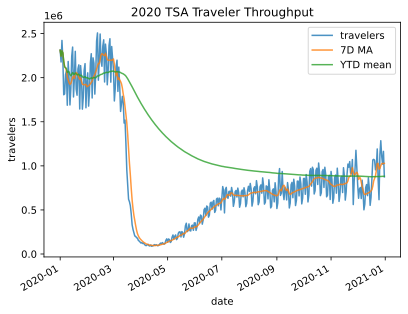

In [50]:
_ = tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

### Exercise 2.5

##### Avec les données de taxi, resampler sur les fréquences horaires (basées sur le dropoff). Calculer le total `trip_distance`, `fare_amount`, `tolls_amount`, et `tip_amount`, et trouver les cinq heures où ça tippe le plus !